In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
%matplotlib inline
import matplotlib.mlab as mlab
from scipy import stats 

In [2]:
rate = pd.read_csv('data.csv')
data = pd.read_csv('st1.csv')

In [3]:
#to get the index of test data
size = int(len(data) * 0.57)
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('data.csv',parse_dates=['date'],index_col=0,date_parser=dateparse)
L = data.index[size:size+52]

In [4]:
train_ar3 = pd.read_csv('data.csv')[0:208]
test_ar3 = pd.read_csv('data.csv')[208:260]

In [5]:
train_ar2=np.array(train_ar3.icol(1))
test_ar2=np.array(test_ar3.icol(1))

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
  from ipykernel import kernelapp as app


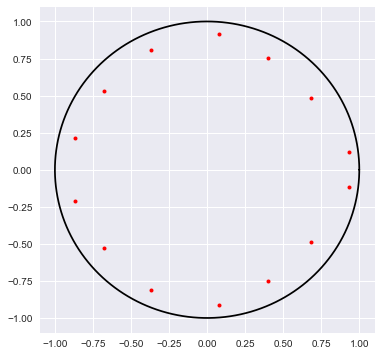

In [6]:
#roots of training data set
wdr1=train_ar2
wdr1
import statsmodels.api as sm
temp = np.array(wdr1)
model = sm.tsa.AR(temp)
results_AR = model.fit()
pi,sin,cos = np.pi,np.sin,np.cos
r1 = 1
theta = np.linspace(0,2*pi,360)
x1 = r1*cos(theta)
y1 = r1*sin(theta)
plt.figure(figsize=(6,6))
plt.plot(x1,y1,'k') 
roots = 1/results_AR.roots  
for i in range(len(roots)):
    plt.plot(roots[i].real,roots[i].imag,'.r',markersize=8) 
plt.show()


/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


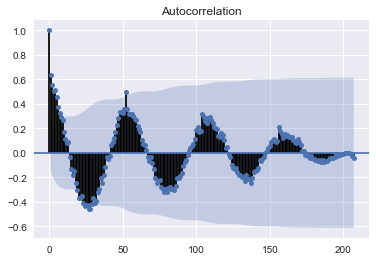

In [7]:
#acf of training data set
data1 = pd.DataFrame(wdr1)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1).show()
fig = plt.figure(figsize=(30,5))

predicted=14.772738, expected=19.693795
predicted=16.988336, expected=20.476245
predicted=18.412495, expected=19.093610
predicted=17.345741, expected=17.987135
predicted=18.489392, expected=17.740433
predicted=18.705492, expected=17.475321
predicted=18.144740, expected=17.688883
predicted=17.804008, expected=17.942949
predicted=17.784996, expected=17.961360
predicted=17.780305, expected=16.980076
predicted=17.431636, expected=17.283851
predicted=17.472698, expected=16.983758
predicted=17.308484, expected=16.602659
predicted=16.902666, expected=17.154977
predicted=17.043777, expected=16.413030
predicted=16.731528, expected=13.758225
predicted=15.431539, expected=16.063229
predicted=15.995266, expected=18.117850
predicted=16.793501, expected=14.908886
predicted=15.354972, expected=16.453534
predicted=16.147421, expected=16.037454
predicted=16.409755, expected=13.844755
predicted=15.086335, expected=16.512447
predicted=15.860334, expected=16.274951
predicted=15.890508, expected=15.453839


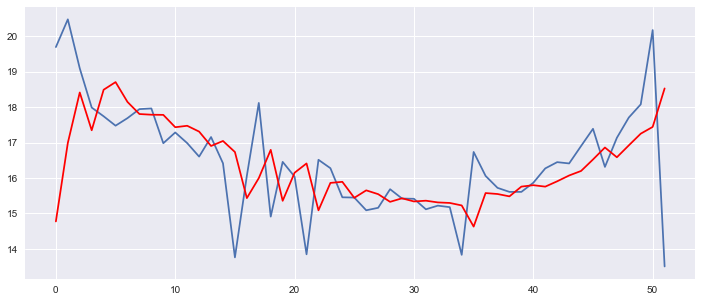

In [8]:
#forecast of weekly death rates in England
import statsmodels.api as sm

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
 
train, test = train_ar2, test_ar2
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = sm.tsa.SARIMAX(history, order=(5,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
fig = plt.figure(figsize=(12,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [9]:
a = pd.DataFrame(predictions)

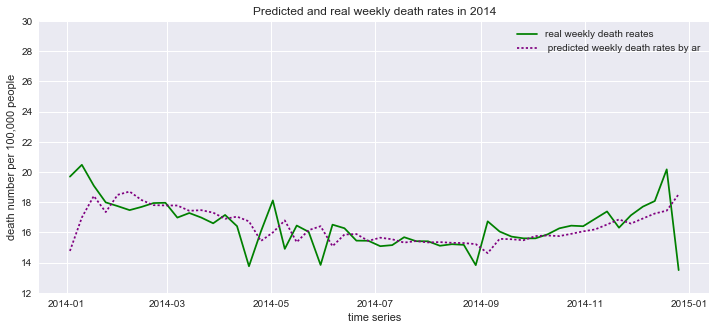

In [10]:
x = L
z = test_ar2
s = predictions
fig = plt.figure(figsize=(12,5))
plt.plot(x,z,label='real weekly death reates',color='green')
plt.plot(x,s,label=' predicted weekly death rates by ar',color="purple",linestyle=':')
plt.xlabel("time series")
plt.ylabel("death number per 100,000 people")
plt.title("Predicted and real weekly death rates in 2014")
from pylab import *
ylim(12,30)
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, make_scorer
mse = mean_squared_error(predictions, test_ar2)
RMSE=np.sqrt(mse)
RMSE

1.4731353125308944

In [12]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(predictions,test_ar2, sample_weight=None, multioutput='uniform_average')
MAE

0.94139740780520009

In [13]:
from sklearn.utils import check_array
from sklearn.utils.validation import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_array(y_true, y_pred)
    return np.mean((np.abs((y_true - y_pred) / y_true)) * 100)
mape = mean_absolute_percentage_error(test_ar2,predictions)
mape

5.7243216202068004

In [14]:
np.corrcoef(test_ar2,predictions)

array([[ 1.        ,  0.38389295],
       [ 0.38389295,  1.        ]])